In [148]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt


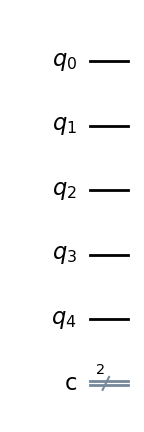

In [149]:
qc = QuantumCircuit(5, 2)  # 5 qubits (3 data + 2 ancilla), 2 classical bits
qc.draw(output="mpl")

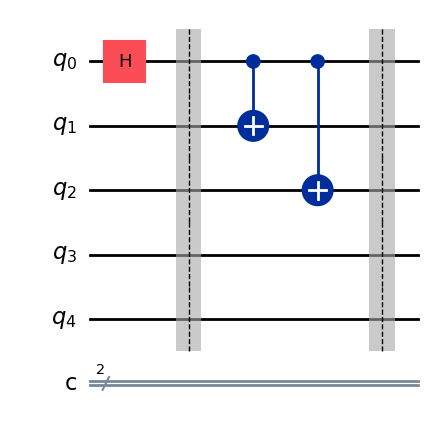

In [150]:
# Step 1: Encoding (|+⟩ logical state)
qc.h(0)        # Put logical qubit in |+⟩ = (|0⟩ + |1⟩)/√2
qc.barrier()
qc.cx(0, 1)    # Encode
qc.cx(0, 2)
qc.barrier()
qc.draw(output="mpl")

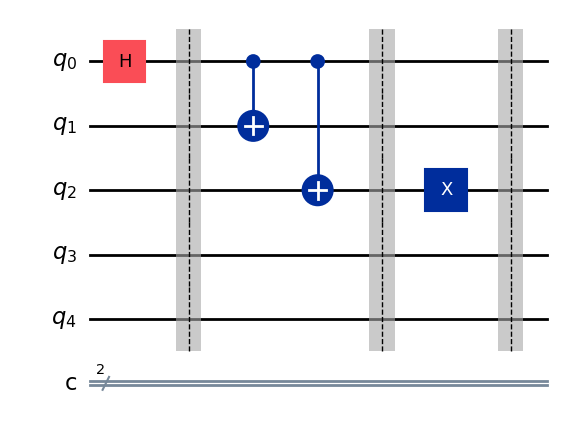

In [151]:
# Step 2: Inject error (bit-flip on qubit 2, for example)
qc.x(2)
qc.barrier()
qc.draw(output="mpl")

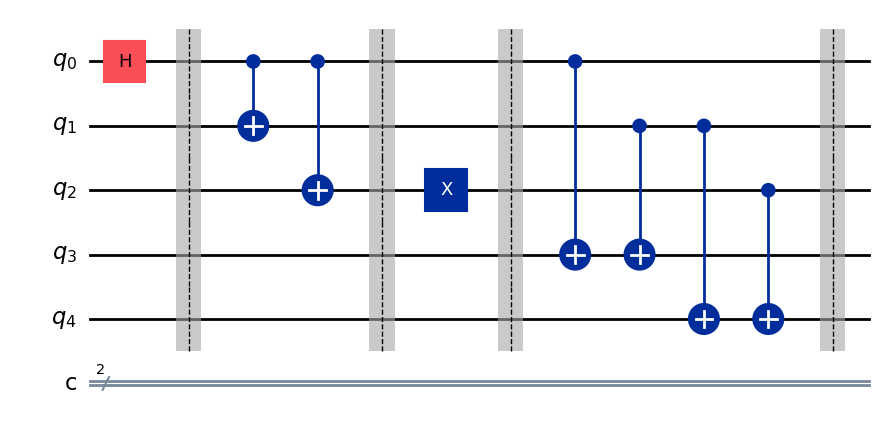

In [152]:
# Step 3: Syndrome measurement (parity checks)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(1, 4)
qc.cx(2, 4)
qc.barrier()
qc.draw(output="mpl")

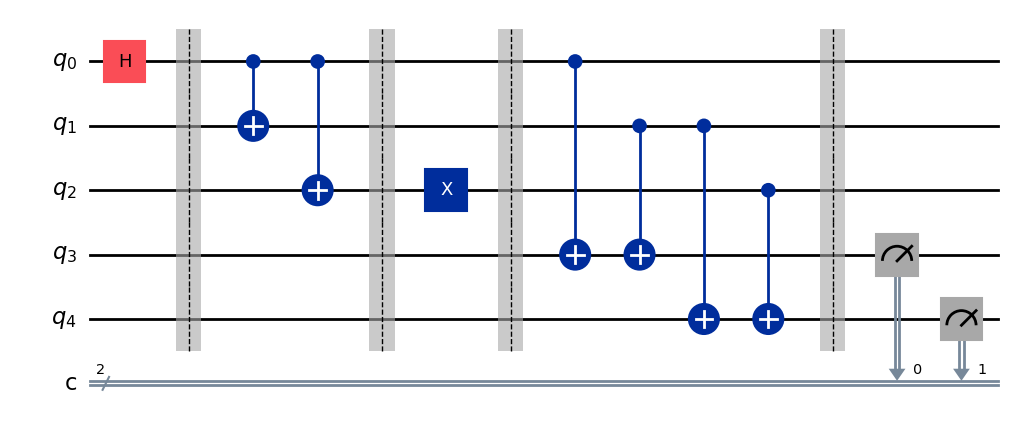

In [153]:
qc.measure(3, 0)  # Ancilla 0 → classical bit 0
qc.measure(4, 1)  # Ancilla 1 → classical bit 1
qc.draw(output="mpl")

Measurement counts: {'10': 1000}
Syndrome measurements:
{'10': 1000}


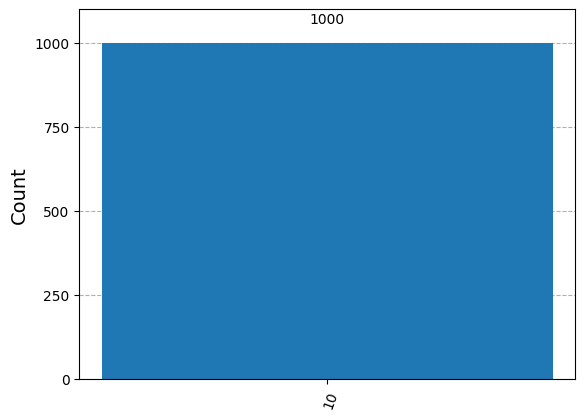

In [154]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000,memory=True) # memory=True otherwise syndrome will not generate

# Get the results
result = job.result()
counts = result.get_counts(qc)
print(f"Measurement counts: {counts}")
# Show the result
print("Syndrome measurements:")
print(counts)
plot_histogram(counts)

In [155]:
# syndrome as a bitstring
syndrome = result.get_memory()[0]
    
print(f"Syndrome: {syndrome}")
correction_circuit = QuantumCircuit(5, 2)

Syndrome: 10


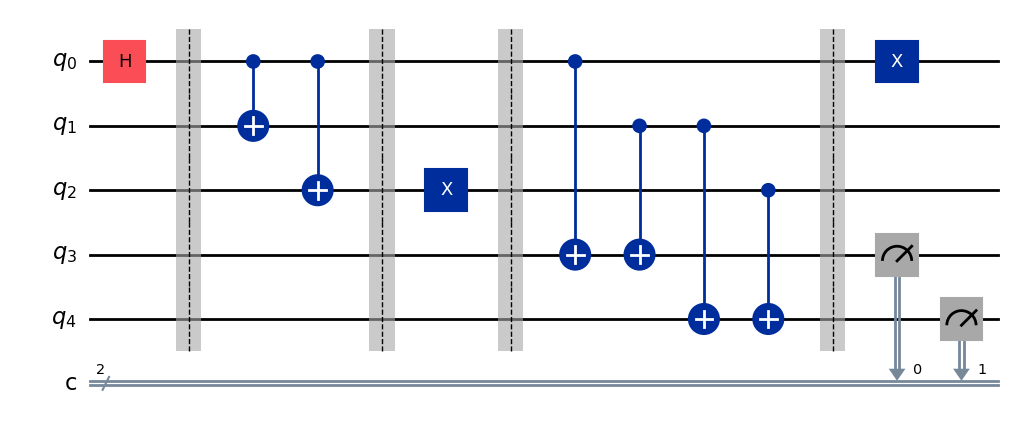

In [156]:
correction = QuantumCircuit(5)
if syndrome == '10':
    qc.x(0)  # Correct qubit 0
elif syndrome == '11':
    qc.x(1)  # Correct qubit 1
elif syndrome == '01':
    qc.x(2)  # Correct qubit 2
else:
    print("No correction needed.")
    
qc.draw(output="mpl")

In [157]:
# Combine syndrome and correction circuits, Combine both circuits and check result
full_circuit = qc.compose(correction)
# Add final measurement to data qubits (optional)
full_circuit.measure_all()

# Transpile the circuit for the simulator
compiled_circuit = transpile(full_circuit, simulator)

# Run the circuit on the simulator
job = simulator.run(full_circuit, shots=1000,memory=True) # memory=True otherwise syndrome will not generate

# Get the results
result = job.result()
counts = result.get_counts()
print(f"Measurement counts: {counts}")



Measurement counts: {'10101 10': 493, '10010 10': 507}


Syndrome measurements:
{'10101 10': 493, '10010 10': 507}


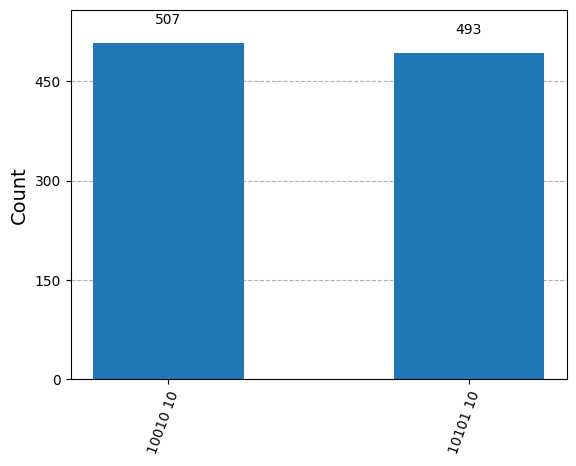

In [158]:
print("Syndrome measurements:")
print(counts)
plot_histogram(counts)